In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

# Cleaning data

In [2]:
df = pd.read_csv("housePrice.csv")
df = df.drop(df[df.Address.isna()].index)
temp = df.Area.tolist()
temp = [int(s.strip().replace(',', '')) for s in temp]
df.Area = temp
df = df.drop(df[df.Area > 1000].index)

adf = df[df.Area > 200]
adf.head(50)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
59,215,3,True,True,True,Pakdasht,1.750000e+09,58333.33
84,300,3,True,True,False,Baghestan,1.500000e+09,50000.00
160,245,3,True,True,True,Farmanieh,2.695000e+10,898333.33
174,236,4,True,True,True,Gheitarieh,2.000000e+10,666666.67
177,220,3,True,True,True,Heravi,1.540000e+10,513333.33
190,320,4,True,True,True,Saadat Abad,2.400000e+10,800000.00
196,210,3,True,True,True,Pasdaran,1.575000e+10,525000.00
201,270,4,True,True,True,Farmanieh,3.780000e+10,1260000.00
227,210,3,True,True,True,Shahrake Gharb,2.700000e+10,900000.00
265,230,3,True,True,True,Niavaran,2.530000e+10,843333.33


# Looking at whole trend

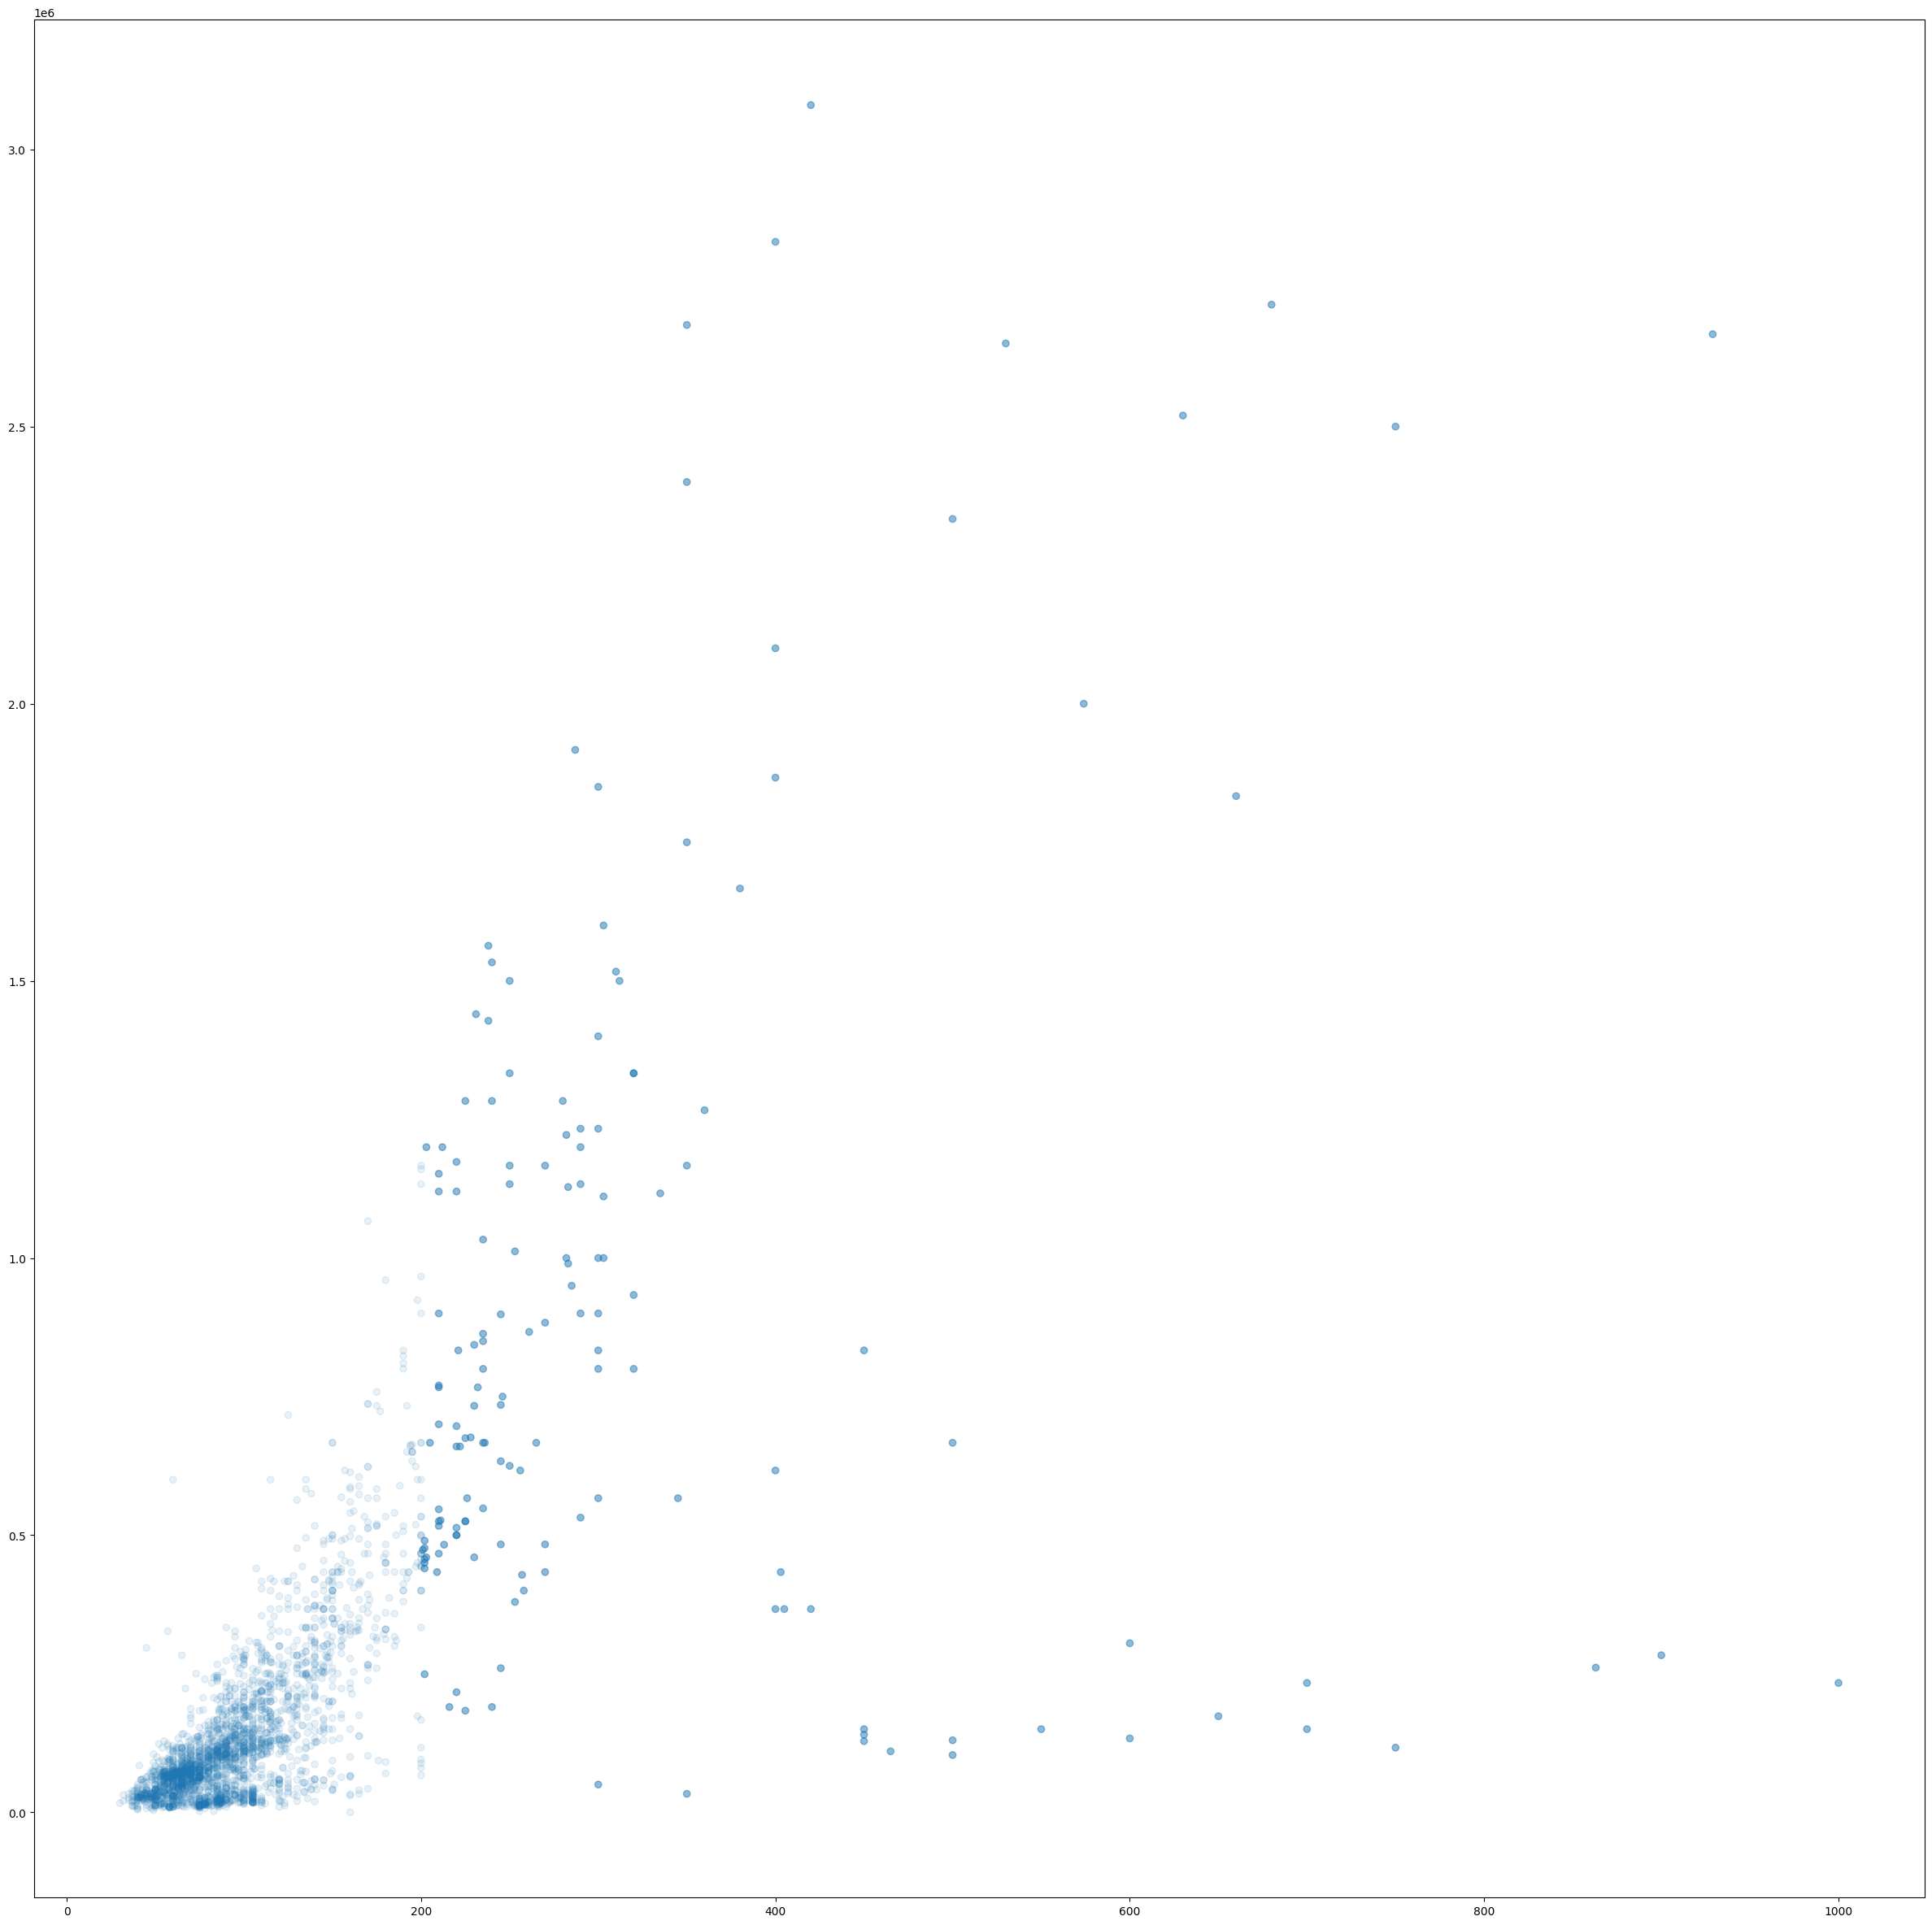

In [32]:
# a = df[df.Address == 'Shahrake Azadi']
# a
msk = np.random.rand(len(df)) < 0.8
cdf = df[msk]

plt.figure(figsize = (30, 30))
a = (cdf.Area <= 200)
a = [0.1 if i else 0.5 for i in a]
plt.scatter(cdf.Area, cdf['Price(USD)'], alpha = a)

In [3]:
address = list(df.Address)
count_dict = dict()

for item in address:
    if item in count_dict:
        count_dict[item] += 1
    else:
        count_dict[item] = 1

sorted_by_values_asc = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=False))
count_dict['Seyed Khandan']

3

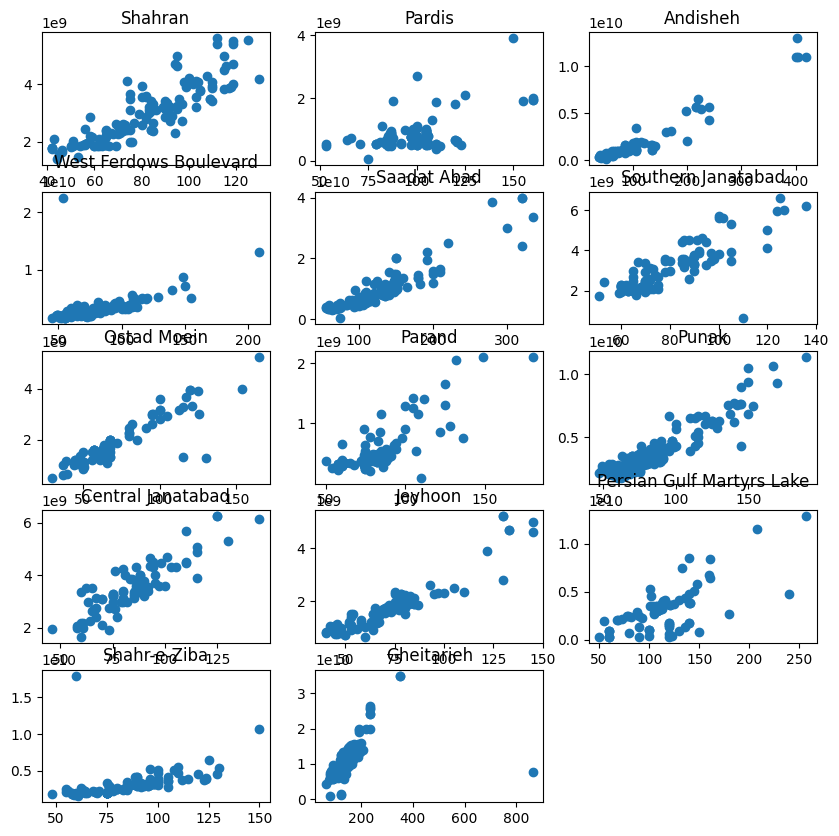

In [24]:
figs = [k for k, v in count_dict.items() if v>80]
plt.figure(figsize = (10, 10))

for fig in figs:
    plt.subplot(5, 3,figs.index(fig)+1)
    cdf = df[df.Address == fig]
    plt.scatter(cdf.Area, cdf.Price)
    plt.title(fig)

plt.savefig('Price_to_Area_high_dens_reigons')

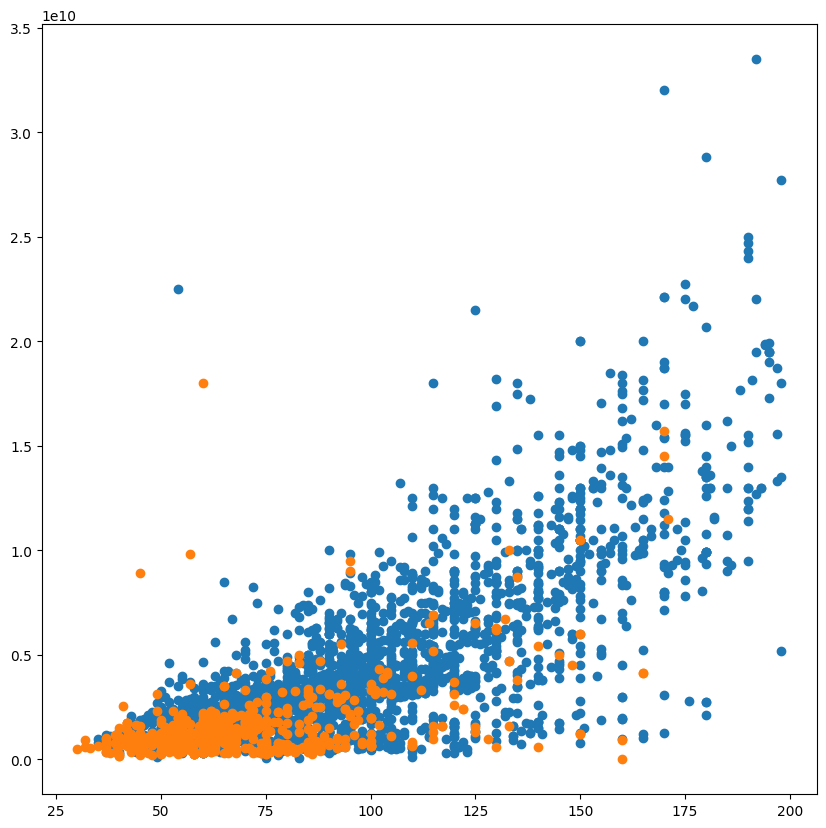

In [4]:
adf = df[df.Area < 200]
logic = (adf.Warehouse == False) | (adf.Parking == False)

cdf = adf[~logic]
cdf2 = adf[logic]
plt.figure(figsize = (10, 10))
plt.scatter(cdf.Area, cdf.Price)
plt.scatter(cdf2.Area, cdf2.Price)

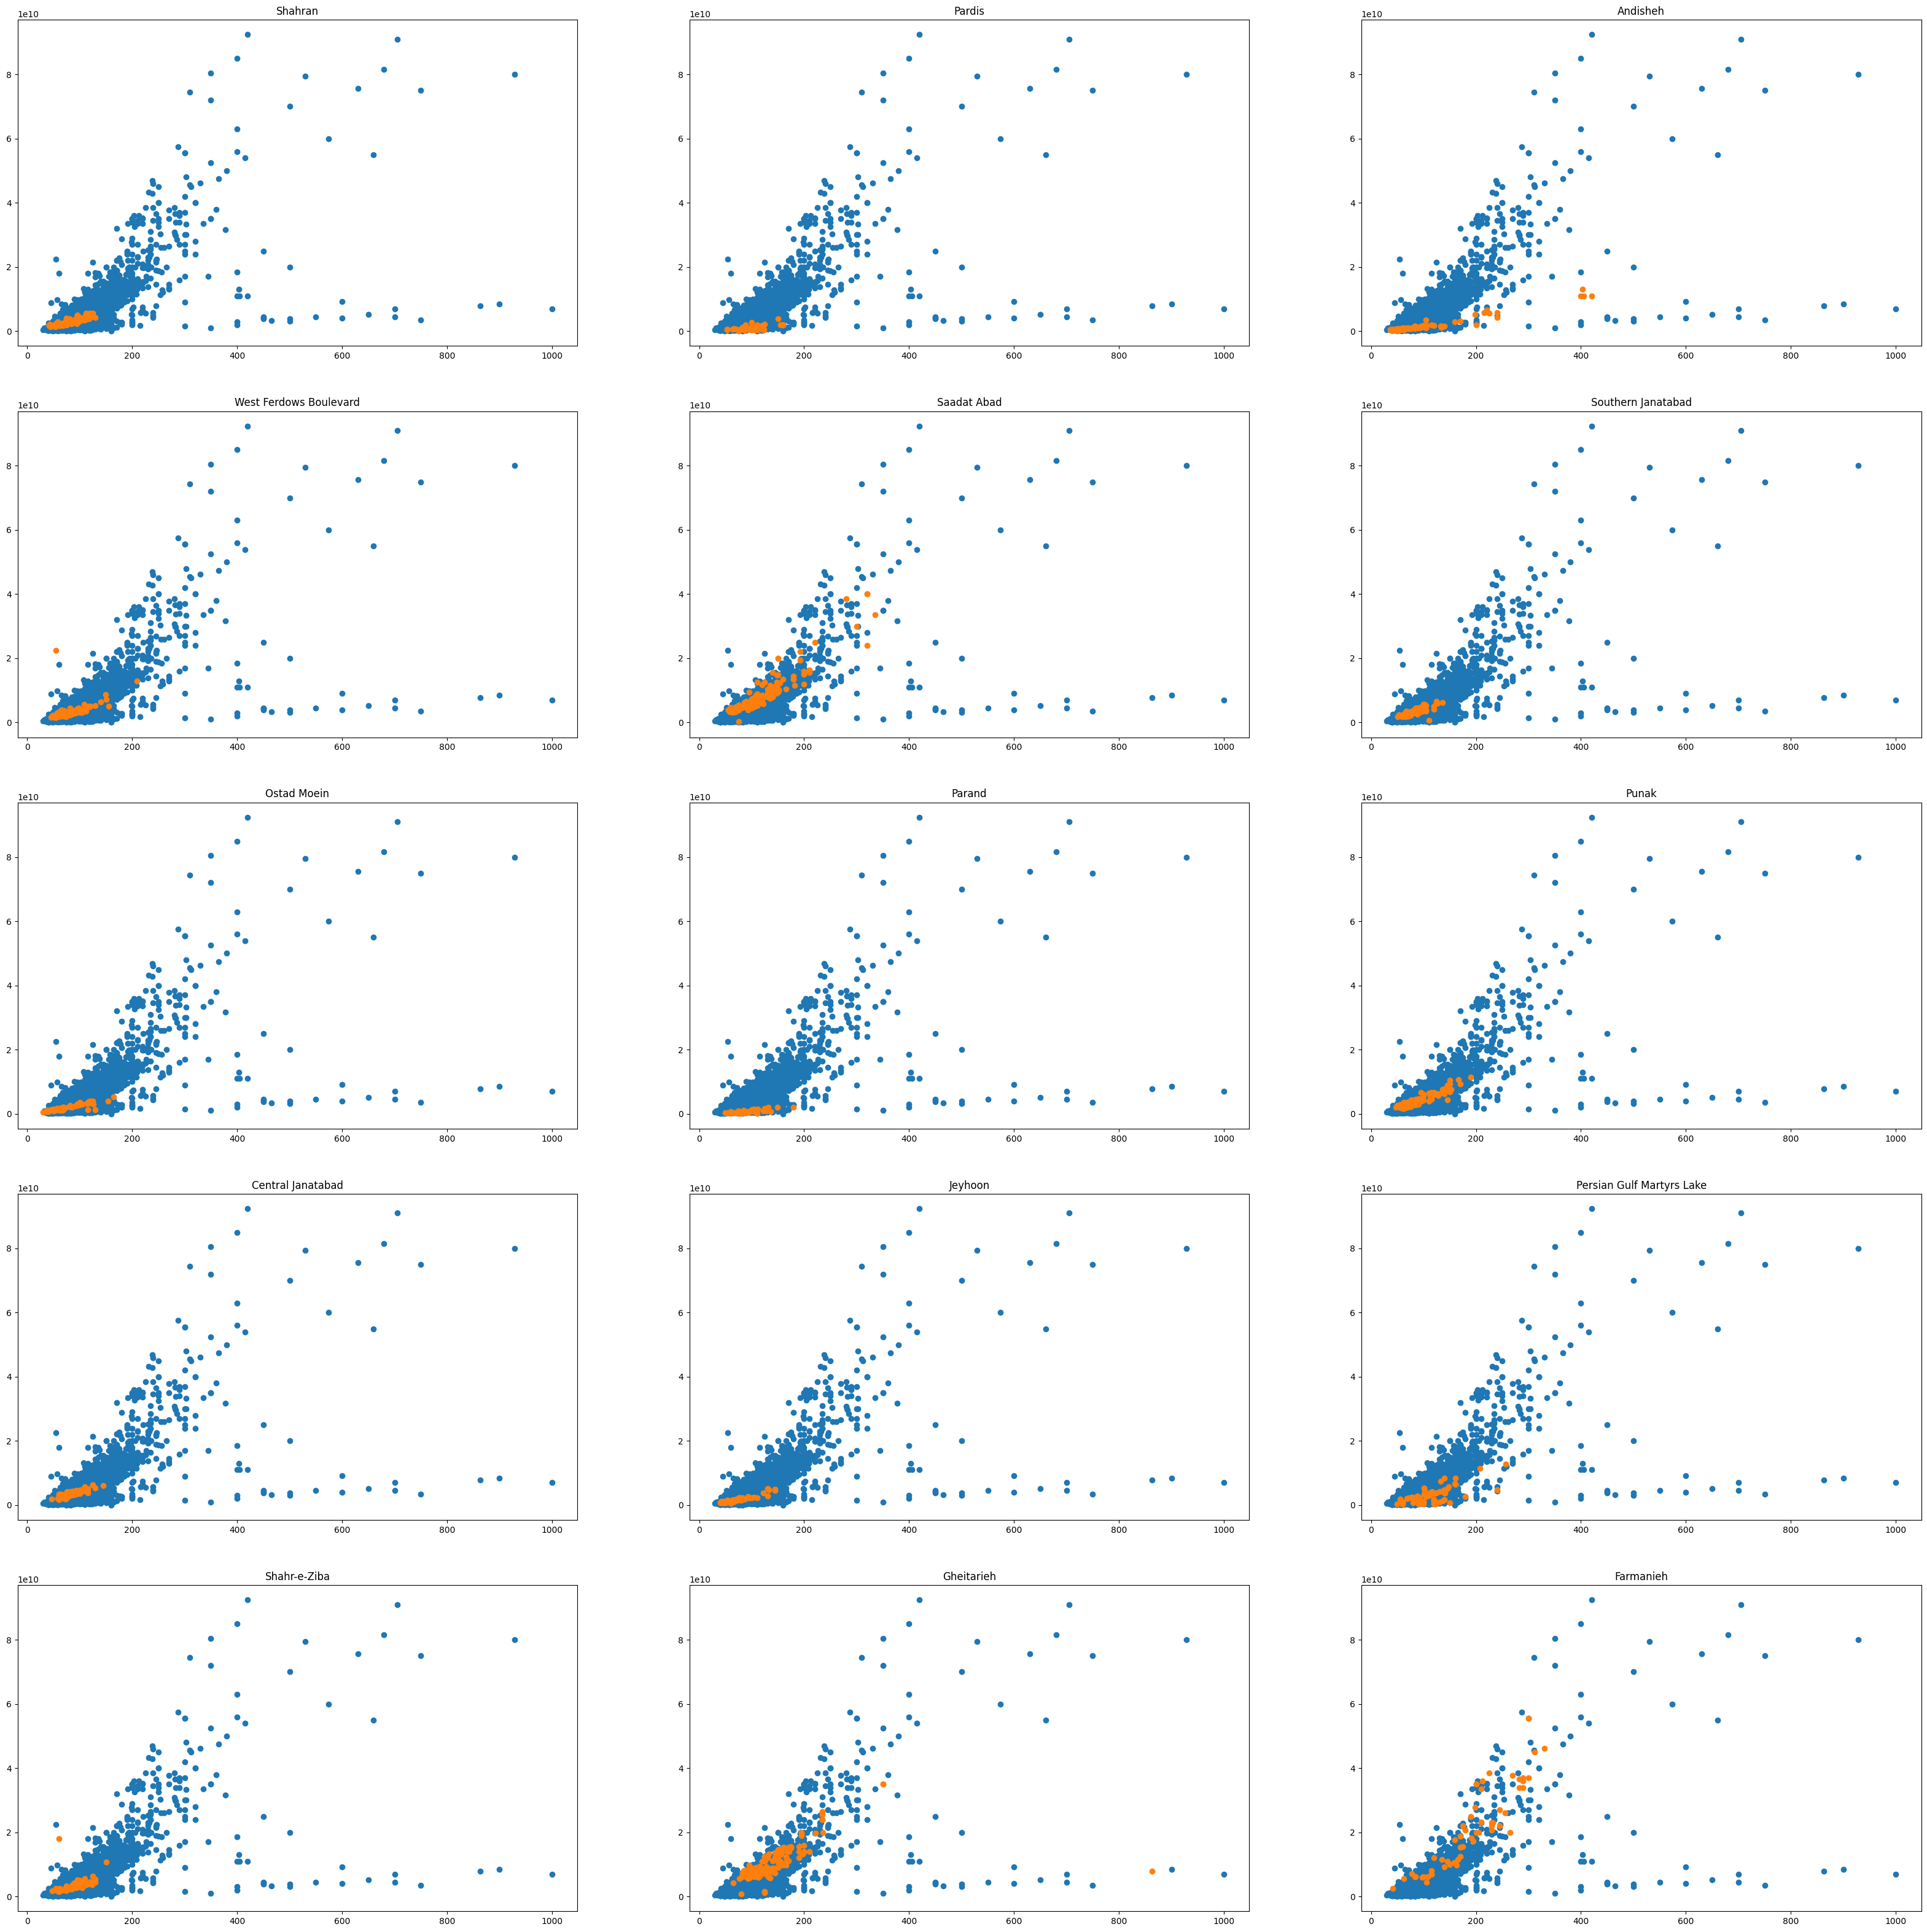

In [44]:
figs = [k for k, v in count_dict.items() if v>80]
plt.figure(figsize = (40, 40))
figs.append('Farmanieh')

for fig in figs:
    plt.subplot(5, 3,figs.index(fig)+1)
    logic = (df.Address == fig)
    
    cdf = df[logic]
    cdf2 = df[~logic]

    plt.scatter(cdf2.Area, cdf2.Price)
    plt.scatter(cdf.Area, cdf.Price)
    plt.title(fig)

# plt.savefig('Price_to_Area_high_dens_reigons')
#'Shahran', 'West Ferdows Boulevard', 'Ostad Moien', 'Centeral janatabad', 'Shahr-e Ziba', 'Southern janatabad', 'Punak', 'Persian Gulf Martyrs Lake', 'Jordan'
#'Pardiss', 'Andisheh', 'Parand', 'jeyhoon'
#'Saadat Abad', 'Geitarieh'

In [83]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [6]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['Area']])
x = x/max(x)
y = np.asanyarray(train[['Price']])
y = y/max(y)
logY = x

regr.fit(logY, y)

x = np.asanyarray(test[['Area']])
x = x/max(x)
y = np.asanyarray(test[['Price']])
y = y/max(y)
logY = x

print(r2_score(y, regr.predict(logY)))

0.3250201446810609


0.5630317891513396


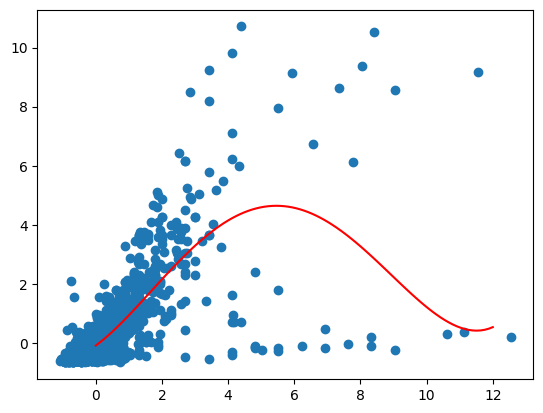

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

degree = 4;

X = np.asarray(df.Area).reshape(-1, 1)
y = np.asarray(df.Price).reshape(-1, 1)
X = StandardScaler().fit(X).transform(X)
y = StandardScaler().fit(y).transform(y)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=10)
    

poly = PolynomialFeatures(degree=degree, include_bias=False)
polyX = poly.fit_transform(X_train)

regr = linear_model.LinearRegression()
regr.fit(polyX, y_train)

polyX = poly.fit_transform(X_test)

print(r2_score(y_test, regr.predict(polyX)))

x = np.linspace(0, 12, 100)
polyX = poly.fit_transform(x.reshape(-1, 1))
plt.scatter(X, y)
plt.plot(x, regr.predict(polyX), color = 'red')

0.3479152233416243
0.48584283639507087


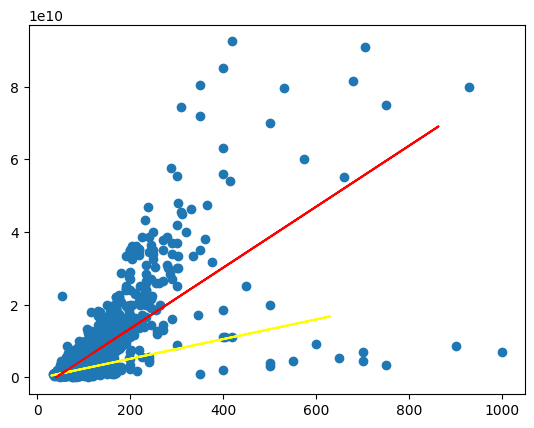

In [84]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regrA = linear_model.LinearRegression()
regrB = linear_model.LinearRegression()

logic = (train.Warehouse == False) | (train.Parking == False)
# logic = (train.Parking == False)
trainA = train[logic]
trainB = train[~logic]

xA = np.asanyarray(trainA[['Area']])
yA = np.asanyarray(trainA[['Price']])
xB = np.asanyarray(trainB[['Area']])
yB = np.asanyarray(trainB[['Price']])

regrA.fit(xA, yA)
regrB.fit(xB, yB)

logic = (test.Warehouse == False) | (test.Parking == False)
# logic = (test.Parking == False)
testA = test[logic]
testB = test[~logic]

xA = np.asanyarray(testA[['Area']])
yA = np.asanyarray(testA[['Price']])
xB = np.asanyarray(testB[['Area']])
yB = np.asanyarray(testB[['Price']])

# def twoLineModel(test):
#     x = test.Area
    
    

y = np.asanyarray(test[['Price']])

print(r2_score(yA, regrA.predict(xA)))
print(r2_score(yB, regrB.predict(xB)))


plt.scatter(trainB.Area, trainB.Price)
plt.plot(xA, regrA.predict(xA), color = 'yellow')
plt.plot(xB, regrB.predict(xB), color = 'red')

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
funcs = [lambda x:x, lambda x:np.exp(x)]

solos = []

for fig in figs:
    adf = df[df.Address == fig]
    msk = np.random.rand(len(adf)) < 0.8
    train = adf[msk]
    test = adf[~msk]

    temp = [fig]
    for func in funcs:
        x = np.asanyarray(train[['Area']])
        x = x/max(x)
        y = np.asanyarray(train[['Price']])
        y = y/max(y)
        logY = func(x)
        
        regr.fit(logY, y)
        
        x = np.asanyarray(test[['Area']])
        x = x/max(x)
        y = np.asanyarray(test[['Price']])
        y = y/max(y)
        logY = func(x)
        
        temp.append(r2_score(y, regr.predict(logY)))
        temp.append(regr.coef_)

    if (temp[1] - temp[2]) >= 0.05 and temp[1]>0.6:
        temp.append('linear')
        temp.append(regr.propt[1])
    elif (temp[2] - temp[1]) >= 0.05 and temp[2]>0.6:
        temp.append('exp')
    elif temp[2] > 0.6:
        temp.append('both')
    else:
        temp.append('none')
    
    solos.append(temp)


solos

orange
415
0.6357112329842287
yellow
165
-0.9604935559008649
red
142
0.8818485421426692


C:\Users\AeyanPC\AppData\Local\Temp\ipykernel_8008\254366253.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(adf[msk].Area, adf[msk].Price, color = 'black')
C:\Users\AeyanPC\AppData\Local\Temp\ipykernel_8008\254366253.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(adf[msk].Area, adf[msk].Price, color = 'black')
C:\Users\AeyanPC\AppData\Local\Temp\ipykernel_8008\254366253.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(adf[msk].Area, adf[msk].Price, color = 'black')
C:\Users\AeyanPC\AppData\Local\Temp\ipykernel_8008\254366253.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(adf[msk].Area, adf[msk].Price, color = 'black')
C:\Users\AeyanPC\AppData\Local\Temp\ipykernel_8008\254366253.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(adf[msk].Area, adf

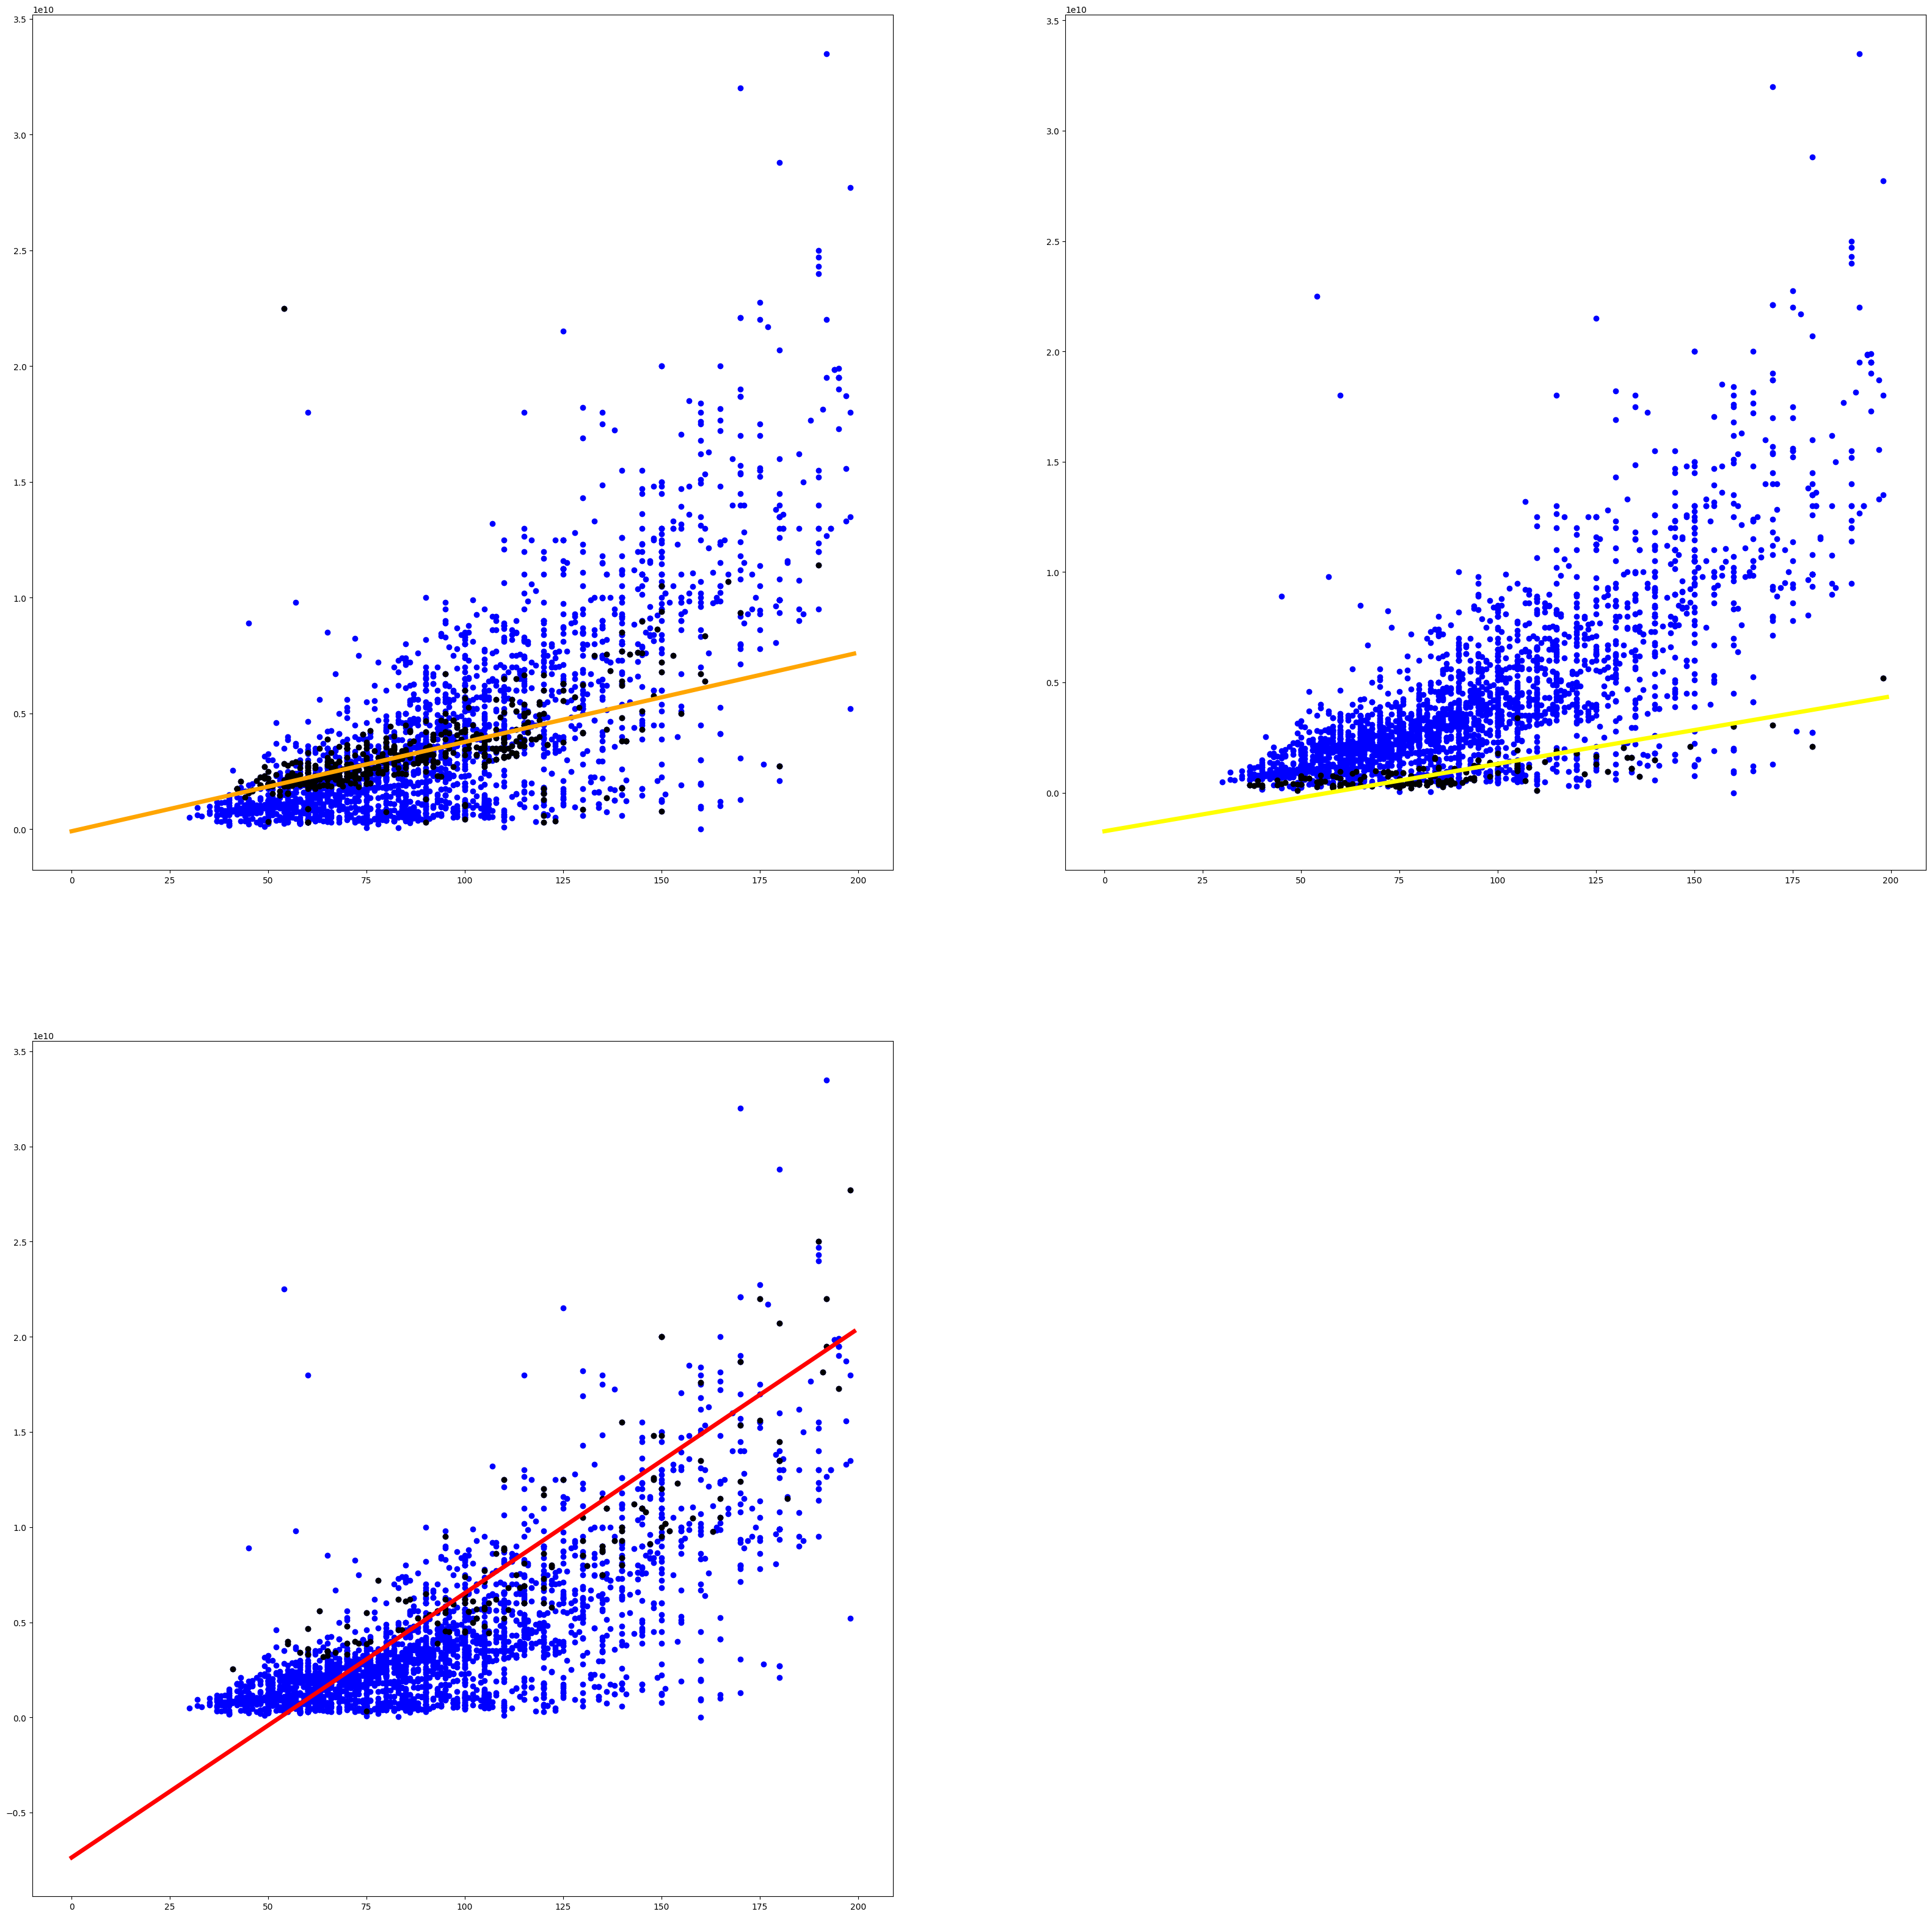

In [26]:
from sklearn import linear_model
from sklearn.metrics import r2_score

trend_1 = ['Shahran', 'West Ferdows Boulevard', 'Centeral janatabad', 'Jordan'
            'Shahr-e Ziba', 'Southern janatabad', 'Punak', 'Persian Gulf Martyrs Lake']
trend_2 = ['Pardiss', 'Andisheh', 'Parand', 'jeyhoon', 'Ostad Moien']
trend_3 = ['Saadat Abad', 'Geitarieh', 'Farmanieh']

trends = [trend_1, trend_2, trend_3]
colors = ['orange', 'yellow', 'red']
regrs = []
i = 0

plt.figure(figsize = (40, 40))
# plt.scatter(df.Area, df.Price)

while i<3:
    regrs.append(linear_model.Ridge( alpha=1))
    
    dt = df[df.Address.isin(trends[i])]

    msk = np.random.rand(len(dt)) < 0.8
    t = dt[msk]

    print(colors[i])
    print(len(t))

    x = np.asanyarray(t[['Area']])
    y = np.asanyarray(t[['Price']])

    regrs[i].fit(x, y)
    
    t = dt[~msk]

    x = np.asanyarray(t[['Area']])
    y = np.asanyarray(t[['Price']])

    print(r2_score(y, regrs[i].predict(x)))

    plt.subplot(2, 2, i+1)
    adf = df[df.Area<200]
    msk = (df.Address.isin(trends[i]))
    plt.scatter(adf.Area, adf.Price, color = 'blue')
    plt.scatter(adf[msk].Area, adf[msk].Price, color = 'black')
    x = np.array(list(range(200))).reshape(-1, 1)
    plt.plot(x, regrs[i].predict(x), color = colors[i], linewidth = 5)

    i += 1

# t = train[train.Address.isin(trends[0])]
# t = df[df.Address.isin(trends[0])]
# plt.scatter(t.Area, t.Price)

-0.0006797965447240539
[ 4.26194972e-05 -6.43656521e+04]


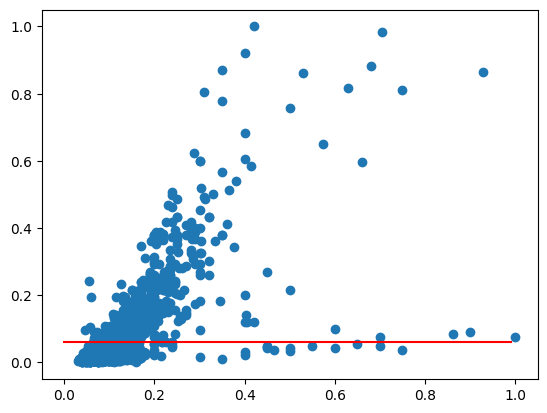

In [141]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def sigmoid(x, a, b):
    return 1/(1+np.exp(a*(x-b)))

xMax = max(np.asanyarray(df[['Area']]))
yMax = max(np.asanyarray(df[['Price']]))

x = np.asanyarray(train[['Area']])
x = x/xMax
x = x.flatten()
y = np.asanyarray(train[['Price']])
y = y/yMax
y = y.flatten()

# plt.scatter(x, y)
popt, pcov = curve_fit(sigmoid, x, y, maxfev = 10000)

x = np.asanyarray(test[['Area']])
x = x/xMax
y = np.asanyarray(test[['Price']])
y = y/yMax


x = np.asanyarray(df[['Area']])
x = x/xMax
y = np.asanyarray(df[['Price']])
y = y/yMax

print(r2_score(y, sigmoid(x, *popt)))
plt.scatter(x, y)
print(popt)
x = np.array(list(range(100)))/100
plt.plot(x, sigmoid(x, *popt), color='red')

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

xMax = max(np.asanyarray(df[['Area']]))
yMax = max(np.asanyarray(df[['Price']]))
leb = LabelEncoder()

slopes = {}

figs = [k for k, v in count_dict.items()]
adf = df[df.Address.isin(figs)]

for address in figs:
    cdf = adf[adf.Address == address]

    x = np.asarray(cdf.Area).reshape(-1, 1)
    x = x/xMax
    y = np.asarray(cdf.Price)
    y = y/yMax

    regr = linear_model.Ridge(alpha = 10)
    regr.fit(x, y)

    # slopes[address] = round(regr.coef_[0], 2)
    if round(regr.intercept_, 1)<0.1:
        if round(regr.intercept_, 2) < 0.02:
            slopes[address] = 0
        else:
            slopes[address] = 0.1
    else:
        slopes[address] = 0.2

# x = np.asarray(list(slopes.keys()))
# x = leb.fit_transform(x)
# x = np.asarray([[i] for i in x])
# y = np.asarray(list(slopes.values()))

# clf = DecisionTreeClassifier(random_state=42)

# # scores = cross_val_score(clf, x, np.ravel(y), cv = 10, error_score='raise')
slopeValues = set(slopes.values())
diffClass = {k:[] for k in slopeValues}

for address, slope in slopes.items():
  diffClass[slope].append(address)

print(diffClass.keys())

temp = [len(i) for i in diffClass.values()]
print(temp)

dict_keys([0.1, 0, 0.2])
[86, 51, 55]


mean score: 0.3774142009691482 scores: [0.43982918 0.36430375 0.450991   0.45253276 0.17941431]
mean score: 0.10448484779632036 scores: [ 0.11647991 -0.36656377  0.25110364  0.35483371  0.16657074]
mean score: 0.6430832765201708 scores: [0.52981248 0.67993075 0.69238477 0.56679018 0.74649821]


IndexError: list index out of range

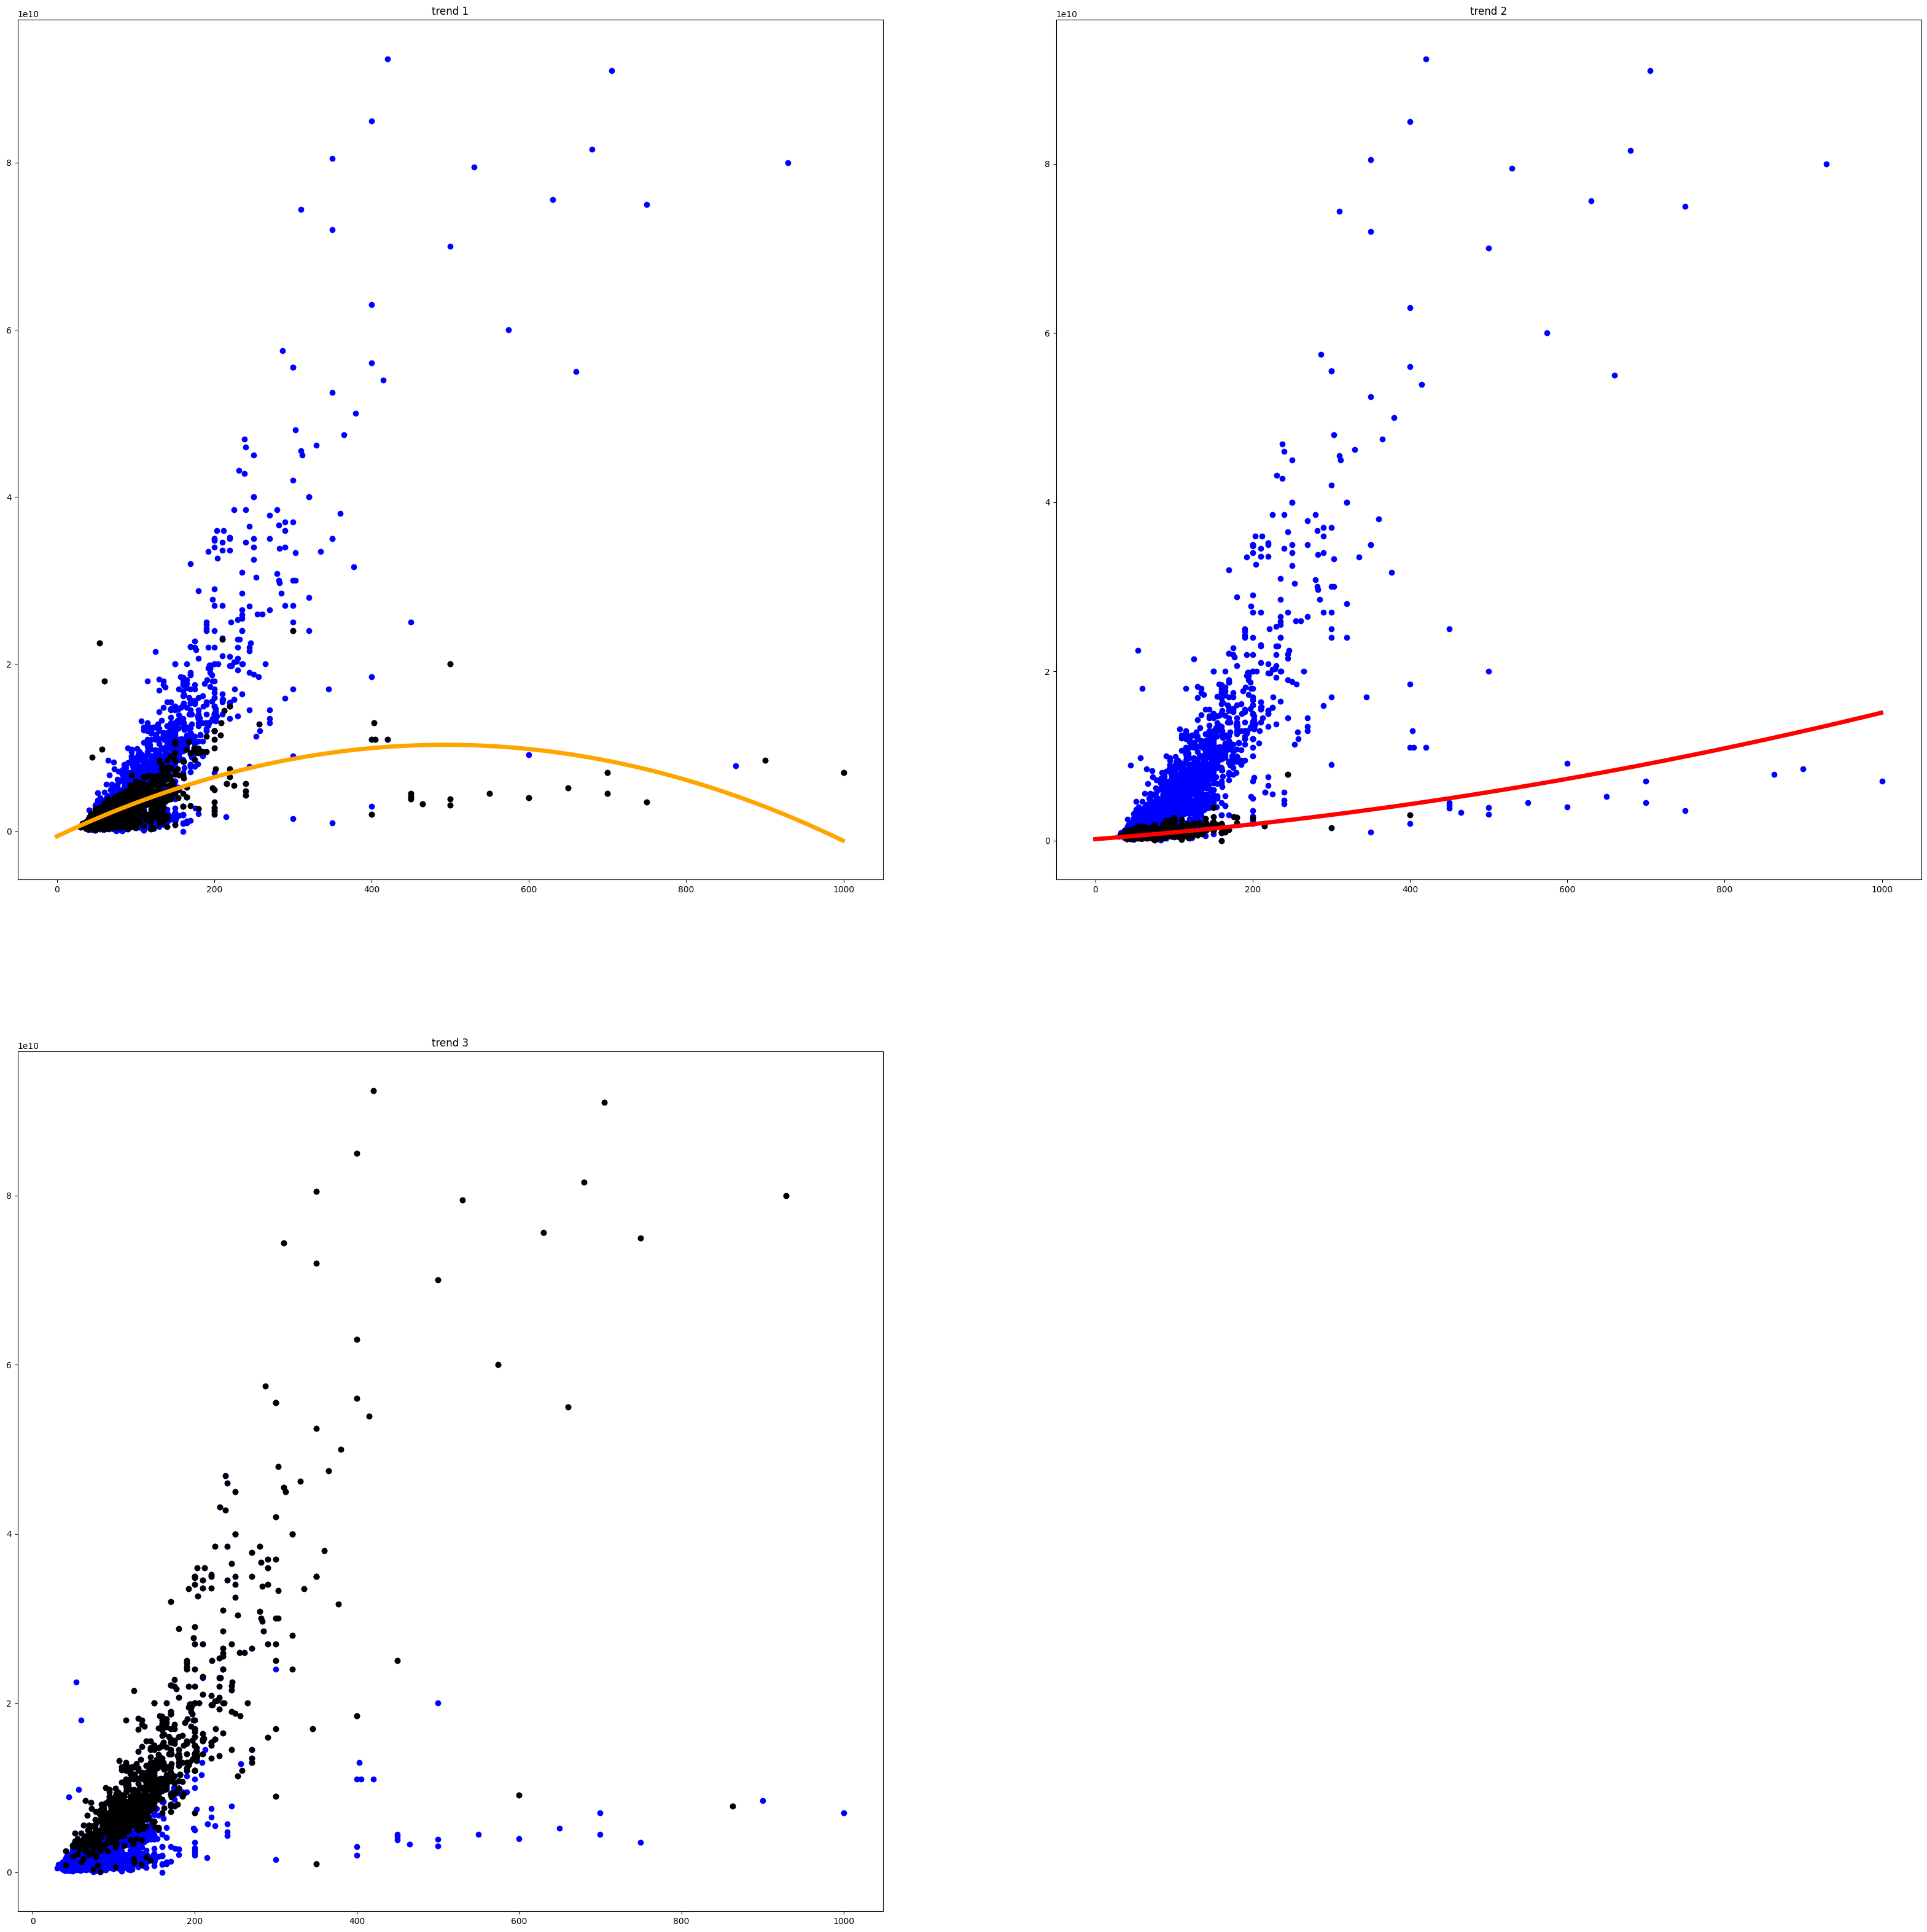

In [150]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures


# trend_1 = ['Shahran', 'West Ferdows Boulevard', 'Centeral janatabad', 'Jordan'
#             'Shahr-e Ziba', 'Southern janatabad', 'Punak', 'Persian Gulf Martyrs Lake']
# trend_2 = ['Pardiss', 'Andisheh', 'Parand', 'jeyhoon', 'Ostad Moien']
# trend_3 = ['Saadat Abad', 'Geitarieh', 'Farmanieh']

# numOfCalls = 1000

trends = list(diffClass.values())
colors = ['orange', 'red']
regrs = []
scores = [[] for i in trends]
j = 0

plt.figure(figsize = (40, 40))
# plt.scatter(df.Area, df.Price)

degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

for trnd in trends:
    i = trends.index(trnd)
        
    regrs.append(linear_model.LinearRegression())
        
    dt = df[df.Address.isin(trnd)]
    
    x = np.asarray(dt.Area)
    polyX = poly.fit_transform(x.reshape(-1, 1))
    y = np.asarray(dt.Price)
        
    # msk = np.random.rand(len(dt)) < 0.8
    # t = dt[msk]
    
        # print(colors[i])
        # print(len(t))
    
    # x = np.asanyarray(t[['Area']])
    # y = np.asanyarray(t[['Price']])
    
    regrs[i].fit(polyX, y)
        
    # t = dt[~msk]
    
    # x = np.asanyarray(t[['Area']])
    # y = np.asanyarray(t[['Price']])
    
    # print(r2_score(y, regrs[i].predict(x)))
    score = cross_val_score(regrs[i], polyX, y, scoring='r2', cv=5)
    print(f'mean score: {np.mean(score)} scores: {score}')
    
    plt.subplot(2, 2, i+1)
    plt.title(f"trend {i+1}")
    adf = df
    msk = (df.Address.isin(trnd))
    plt.scatter(adf.Area, adf.Price, color = 'blue')
    plt.scatter(adf[msk].Area, adf[msk].Price, color = 'black')
    x = np.array(list(range(1000))).reshape(-1, 1)
    polyX = poly.fit_transform(x.reshape(-1, 1))
    plt.plot(x, regrs[i].predict(polyX), color = colors[i], linewidth = 5)



In [ ]:
one_dot = [k for k,v in count_dict.items() if v==1]

plt.figure(figsize = (40, 40))

t1 = []
t2 = []
for k in one_dot:
    try:
        trnd.index(k)
        t2.append(k)
    except:
        t1.append(k)

plt.subplot(2, 2, i+1)
plt.title(f"trend {i+1}")
adf = df
msk = (df.Address.isin(t1))
plt.scatter(adf.Area, adf.Price, color = 'blue')
plt.scatter(adf[msk].Area, adf[msk].Price, color = 'red')
msk = (df.Address.isin(t2))
plt.scatter(adf[msk].Area, adf[msk].Price, color = 'yellow')
x = np.array(list(range(200))).reshape(-1, 1)
print(len(one_dot))

Text(0, 0.5, 'maxMin y')

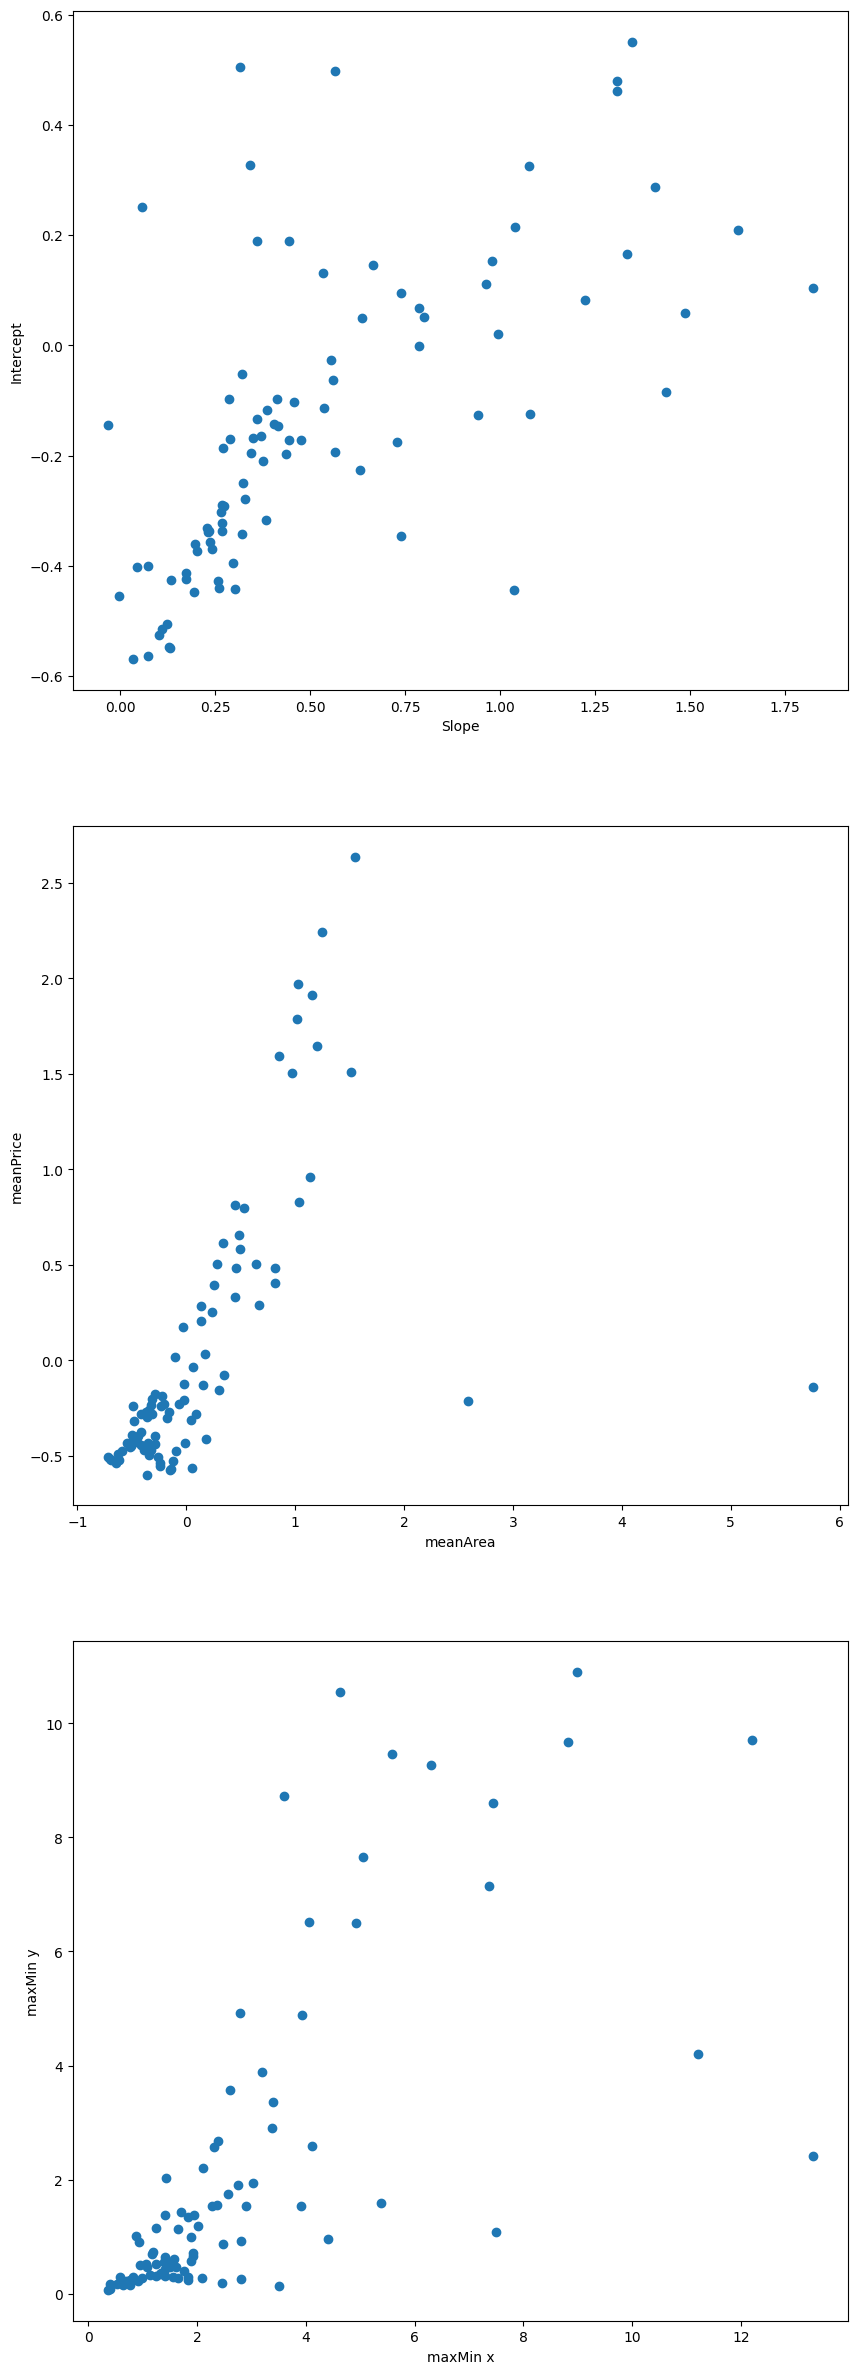

In [92]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler


figs = [k for k, v in count_dict.items() if v>5]
# figs.remove('Argentina')
# figs.remove('Amir Bahador')
# figs.remove('Lavasan')
remFigs = [k for k in count_dict.keys() if k not in figs]



size = len(figs)
slope = np.zeros(size)
intercept = np.zeros(size)
mean = np.zeros((size, 2))
maxMin = np.zeros((size, 2))
name = []
i = 0


scalerX = StandardScaler().fit(np.asarray(df.Area).reshape(-1, 1))
scalerY = StandardScaler().fit(np.asarray(df.Price).reshape(-1, 1))

for address in figs:
    cdf = df[df.Address == address]

    x = np.asarray(cdf.Area).reshape(-1, 1)
    y = np.asarray(cdf.Price).reshape(-1, 1)
    x = scalerX.transform(x)
    y = scalerY.transform(y)

    mean[i][0] = np.mean(x)
    mean[i][1] = np.mean(y)

    maxMin[i][0] = np.max(x) - np.min(x)
    maxMin[i][1] = np.max(y) - np.min(y)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    
    slope[i] = regr.coef_[0][0]
    intercept[i] = regr.intercept_[0]
    name.append(address)

    i += 1


# scaler = MinMaxScaler()
# slope = scaler.fit_transform(slope.reshape(-1, 1))
# intercept = scaler.fit_transform(intercept.reshape(-1, 1))
        
plt.figure(figsize=(10, 30))

plt.subplot(3, 1, 1)
plt.scatter(slope, intercept)
plt.xlabel('Slope')
plt.ylabel('Intercept')
# for i, label in enumerate(name):
#     plt.annotate(label, (slope[i], intercept[i]), textcoords="offset points", xytext=(5,-5), ha='center', fontsize = 5)

plt.subplot(3, 1, 2)
plt.scatter(mean[:,0], mean[:, 1])
plt.xlabel('meanArea')
plt.ylabel('meanPrice')

# plt.savefig('slope_intercept_figure_addresslabaled')

plt.subplot(3, 1, 3)
plt.scatter(maxMin[:,0], maxMin[:, 1])
plt.xlabel('maxMin x')
plt.ylabel('maxMin y')

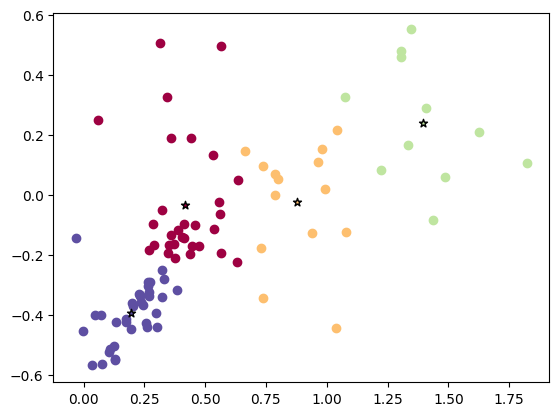

In [100]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

k = 4
trends = []
name = np.asarray(name)

x = list(zip(slope, intercept))
# x = slope.reshape(-1, 1)
x = np.asarray(x)
# x = mean
# x = maxMin


k_means = KMeans(n_clusters=k, n_init = 30)
# k_means = DBSCAN(eps=0.1, min_samples=k)
k_means.fit(x)


centers = k_means.cluster_centers_
colors = plt.cm.Spectral(np.linspace(0, 1, k))

for l, col in zip(range(k), colors):
    my_members = (k_means.labels_ == l)
    cen = centers[l]
    trends.append(list(name[my_members]))
    
    plt.scatter(x[my_members, 0], x[my_members, 1], color = col)
    plt.scatter(cen[0], cen[1], marker = '*', color = col, edgecolor = 'k')

for address in remFigs:
    cdf = df[df.Address == address]

    x = np.asarray(cdf.Area).reshape(-1, 1)
    y = np.asarray(cdf.Price).reshape(-1, 1)
    x = scalerX.transform(x)
    y = scalerY.transform(y)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    x = regr.coef_[0]
    y = regr.intercept_

    ind = list(zip(x,y))
    ind = np.asarray(ind)
    trnd = k_means.predict(ind)[0]
    trends[trnd].append(address)

    # plt.scatter(x, y, color = colors[trnd])

# print(trends[2])
# print(centers[1])

degree: 2 mean score: 0.7112749374945755 scores: [0.7426104  0.7975944  0.67498806 0.70090517 0.64027665]
degree: 1 mean score: 0.7445531340394876 scores: [0.92703522 0.17701696 0.73043476 0.94543266 0.94284607]
degree: 1 mean score: 0.8240473487545197 scores: [0.88269531 0.78352615 0.91509699 0.79457418 0.74434412]
degree: 2 mean score: 0.3921540818970779 scores: [0.39539457 0.40585309 0.38448231 0.50662063 0.26841981]
score: 0.6680073755464151


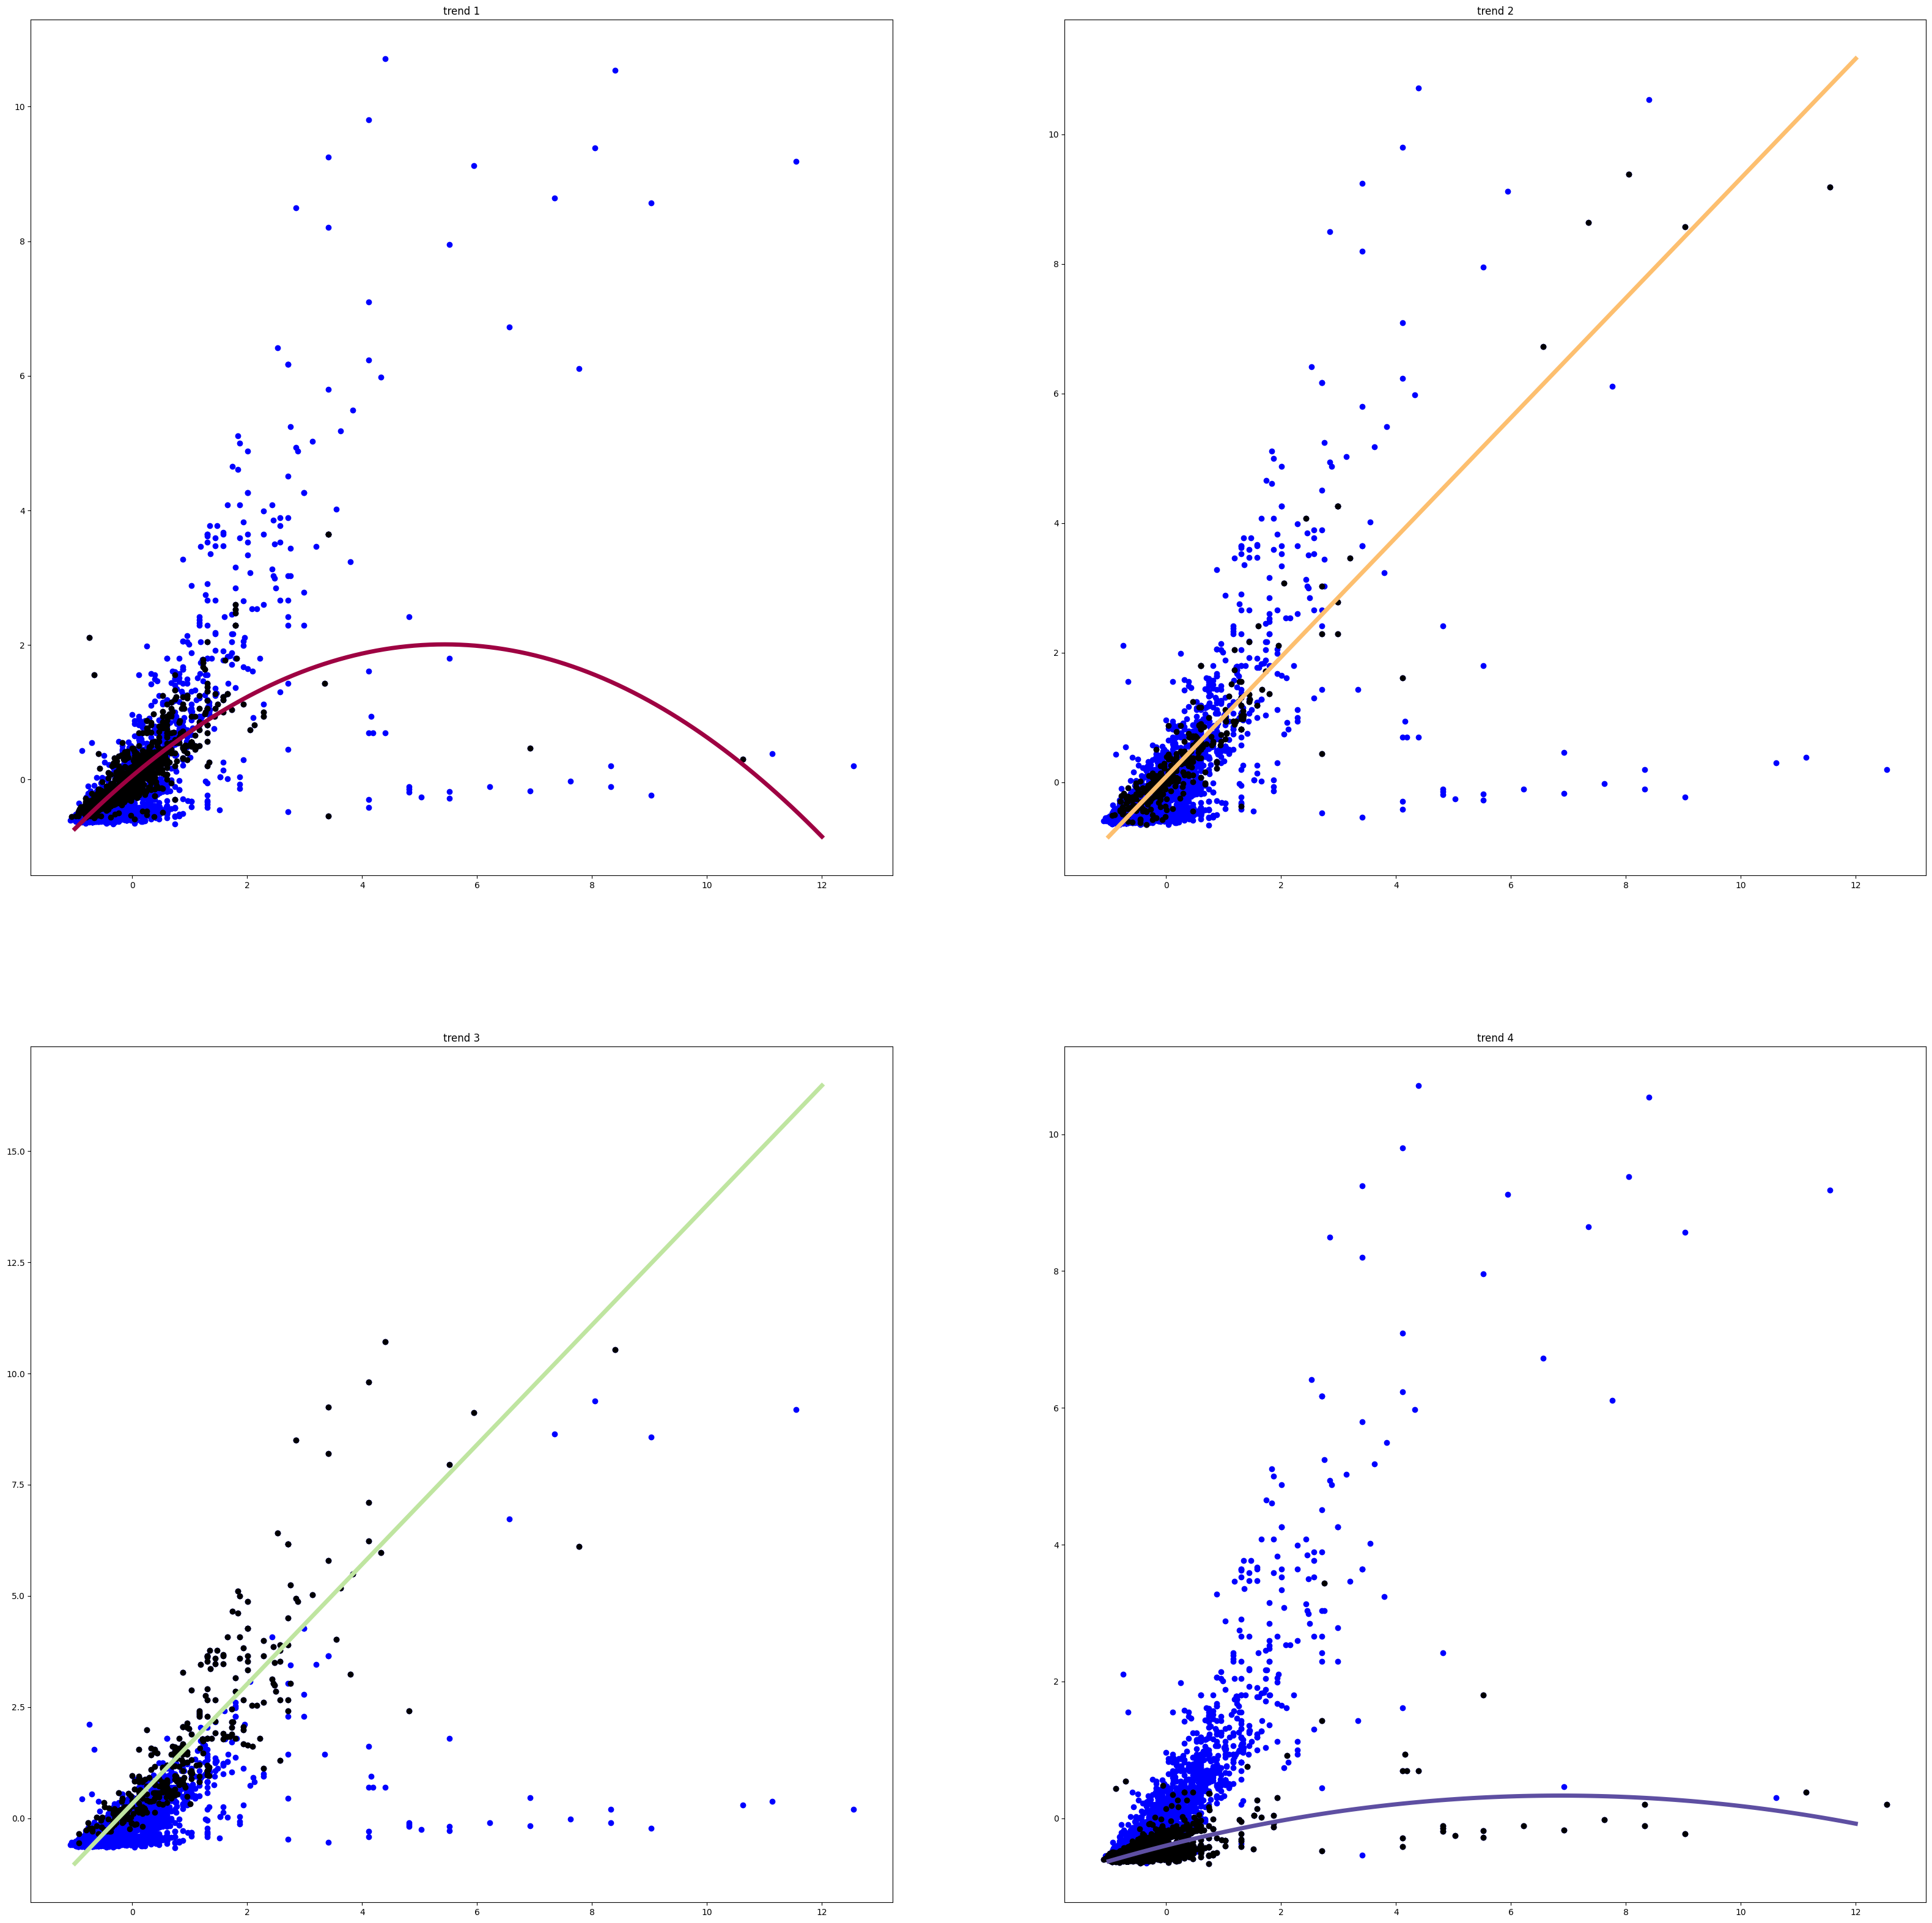

In [101]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit
from math import ceil


regrs = []
maxScore = 3
sumMean = 0
    
plt.figure(figsize = (40, 40))
    # plt.scatter(df.Area, df.Price)
    
degrees = []
scores = []
    # poly = PolynomialFeatures(degree=degree, include_bias=False)
    
x = scalerX.transform(np.asarray(df.Area).reshape(-1, 1))
y = scalerY.transform(np.asarray(df.Price).reshape(-1, 1))

    
for trnd in trends:
    j = 1
    i = trends.index(trnd)
    
        
    while j<maxScore:
        regr = linear_model.LinearRegression()
        poly = PolynomialFeatures(degree=j, include_bias=False)
            
                
        dt = df[df.Address.isin(trnd)]
            
        X = np.asarray(dt.Area).reshape(-1, 1)
        X = scalerX.transform(X)
        polyX = poly.fit_transform(X.reshape(-1, 1))    
        Y = np.asarray(dt.Price).reshape(-1, 1)
        Y = scalerY.transform(Y)
                
            
        regr.fit(polyX, Y)
    
        cv = ShuffleSplit(n_splits=5, random_state=10)
        score = cross_val_score(regr, polyX, Y, scoring='r2', cv=cv)
        score = np.append(score, np.mean(score))

        
            
        if len(scores) <= i:
            scores.append(score)
            degrees.append(j)
            regrs.append(regr)
        elif score[5] > scores[i][5]:
            scores[i] = score
            degrees[i] = j
            regrs[i] = regr
    
        j += 1


       
    print(f'degree: {degrees[i]} mean score: {scores[i][5]} scores: {scores[i][0:5]}')
    sumMean += scores[i][5]
    
    plt.subplot(2, ceil(k/2), i+1)
    plt.title(f"trend {i+1}")
    msk = (df.Address.isin(trnd))
    plt.scatter(x, y, color = 'blue')
    plt.scatter(x[msk], y[msk], color = 'k')
    X = np.linspace(-1, 12, 100).reshape(-1, 1)
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    polyX = poly.fit_transform(X.reshape(-1, 1))
    plt.plot(X, regrs[i].predict(polyX), color = colors[i], linewidth = 5)

print(f"score: {sumMean/k}")

In [162]:
from sklearn.cluster import KMeans


['North Program Organization', 'Narmak', 'Zafar', 'Gisha', 'Sattarkhan', 'Marzdaran', 'Golestan', 'Heravi', 'Dehkade Olampic', 'Valiasr', 'Ekhtiarieh', 'Ozgol', 'Tajrish', 'Kook', 'Dezashib', 'Northern Suhrawardi', 'Araj']
